# Лабораторне заняття №9

# Незалежність та некорельованість
На цьому занятті ми розглянемо випадкові вектори, складені з випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 3D графіки

In [2]:
# Class that anables 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Class of color maps
from matplotlib import cm

# %matplotlib inline
# This line makes 3D plots in Jupyter Notebook interactive (uncomment to anable)
%matplotlib notebook

### 1.1 Графік кривої поверхні

#### 1.1.1 Функція `numpy.meshgrid`

Детальна інформація про функцію `meshgrid` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [3]:
nx, ny = (3, 2)
x = np.arange(nx)
y = np.arange(ny)
print(x)
print(y)

[0 1 2]
[0 1]


In [4]:
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)

[[0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]]


In [5]:
xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
print(xv)
print(yv)

[[0 1 2]]
[[0]
 [1]]


#### 1.1.2 Параболоїд

Зобразіть графік поверхні параболоїда, що задається таким рівнянням:
$$x^2 + y^2 - z = 0, \qquad x, y \in [-1, 1].$$

Детальна інформація про функцію `plot_surface` в [документації](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots).

<IPython.core.display.Javascript object>


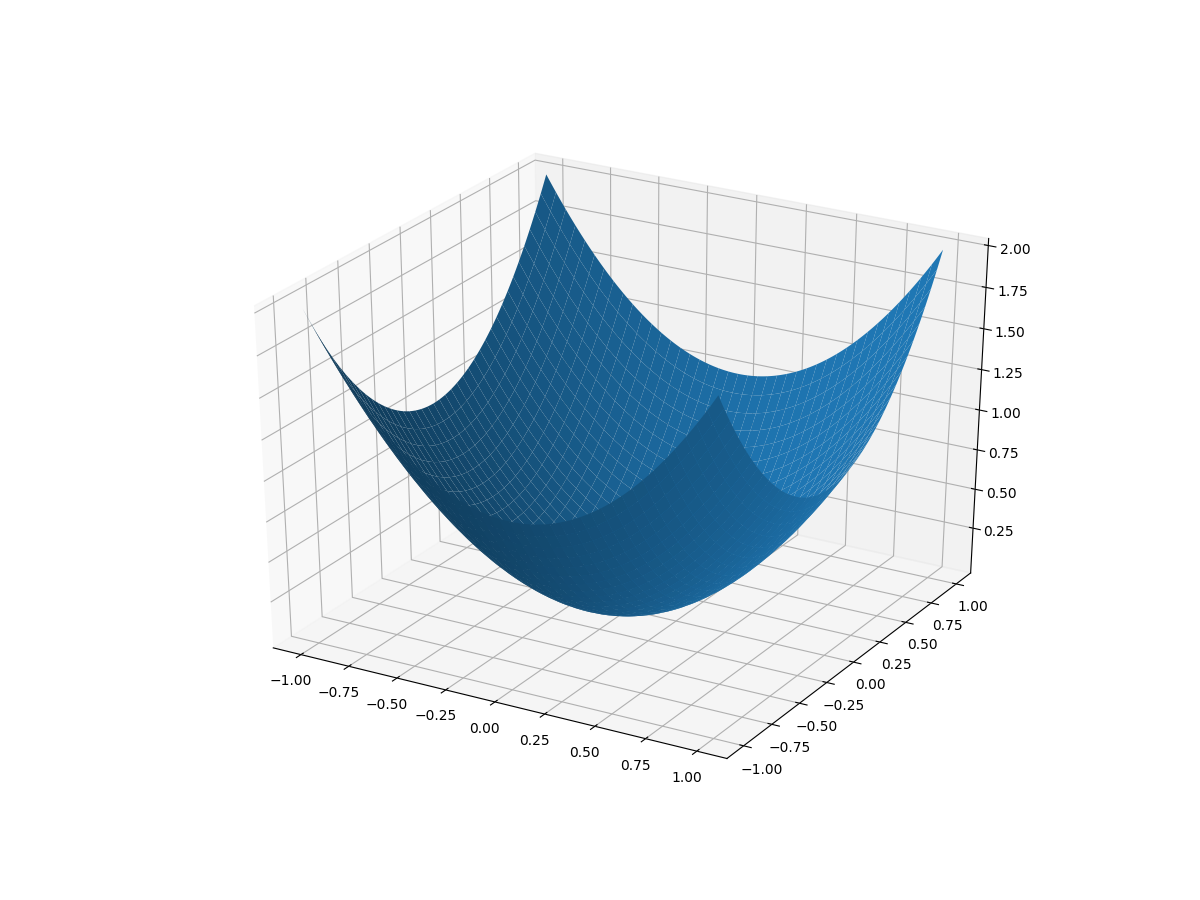

In [6]:
# Prepare the figure
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d') # this adds 3-rd axis to the plot

# Make data.
x = np.arange(-1, 1.01, 0.01)
y = np.arange(-1, 1.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z)

plt.show()

### 1.2 Контурний графік

Зобразіть контурний графік параболоїда, отриманого в попередньому завданні.

Детальна інформація про функцію `contourf` в [документації](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html).

<IPython.core.display.Javascript object>


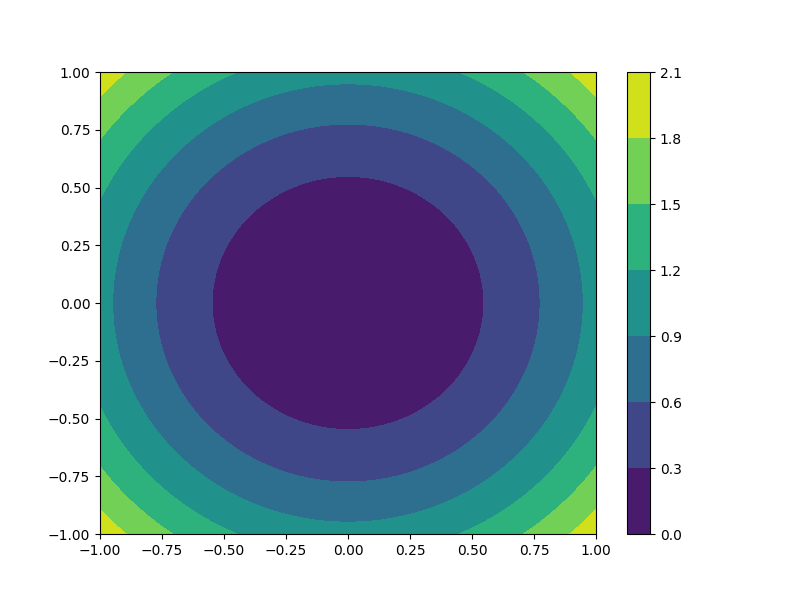

In [7]:
# Prepare the figure
fig = plt.figure(figsize=(8,6))

# Make a filled contour plot
cont = plt.contourf(X,Y,Z)

# Add a color bar which maps values to colors
fig.colorbar(cont)

plt.show()

### 1.3 Графік поверхні та контурний графік

Зобразіть графік поверхні та контурний графік функції, що задається таким рівнянням:
$$z = \sin \sqrt{x^2 + y^2}, \qquad x, y \in [-5, 5].$$

<IPython.core.display.Javascript object>


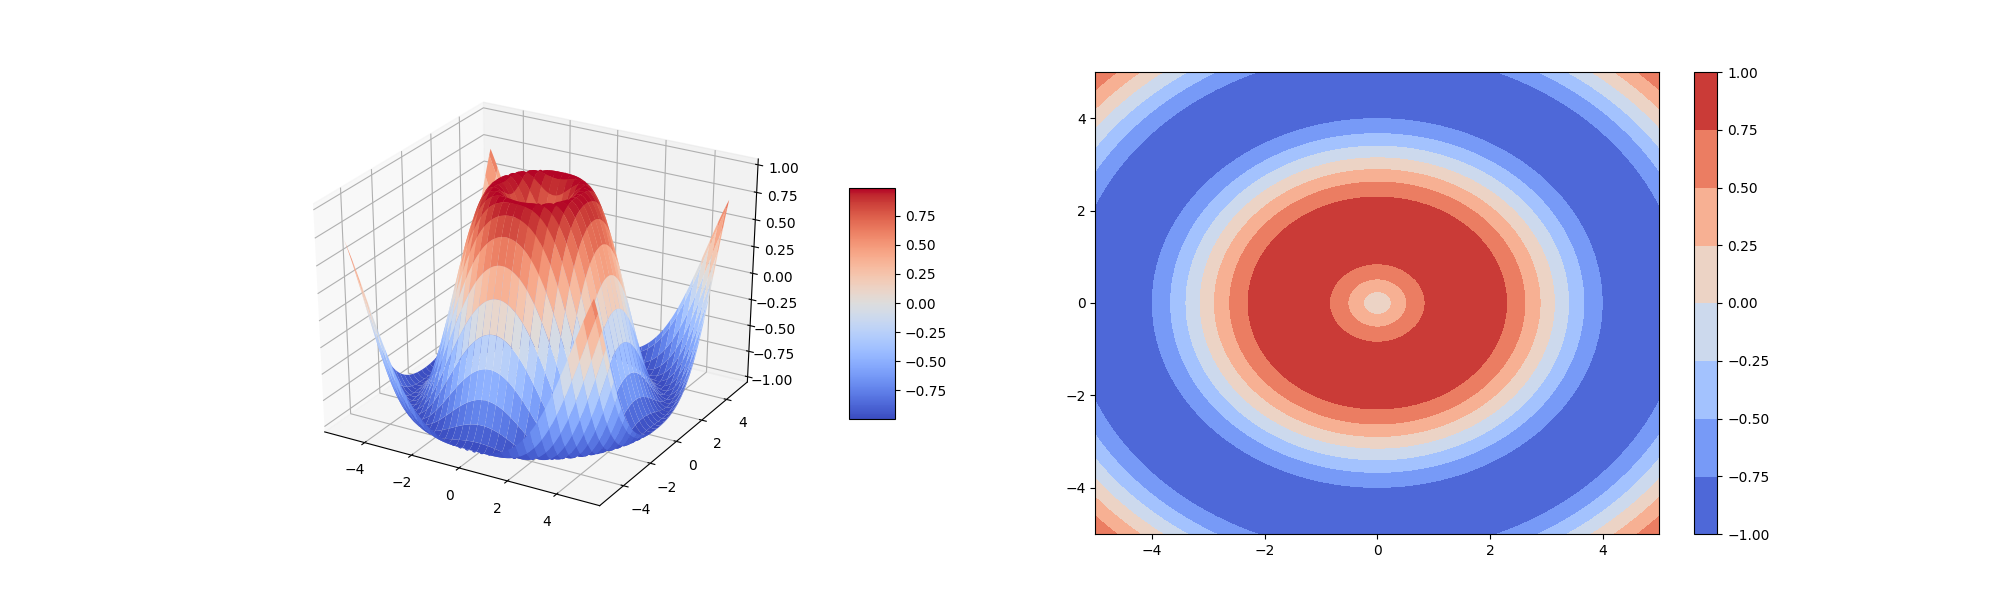

In [42]:
# Prpare the figure
fig = plt.figure(figsize=(20, 6))

# Add subplot for 3D plotting
ax1 = fig.add_subplot(121, projection='3d')

# Make data
x = np.arange(-5, 5.1, 0.1)
y = np.arange(-5, 5.1, 0.1)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface with colormap for z axis values
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm)

# Customize the z axis
ax1.set_zlim(-1.01, 1.01)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add subplot for 2D plotting
ax2 = fig.add_subplot(122)

# Make contour plot of the surface
cont = ax2.contourf(X,Y,Z, cmap=cm.coolwarm)

# Add a color bar which maps values to colors
fig.colorbar(cont)

plt.show()

### 1.4 Сідло

Зобразіть графік поверхні та контурний графік функції, що задається таким рівнянням:
$$x^2 - y^2 - z = 0, \qquad x, y \in [-5, 5].$$

<IPython.core.display.Javascript object>


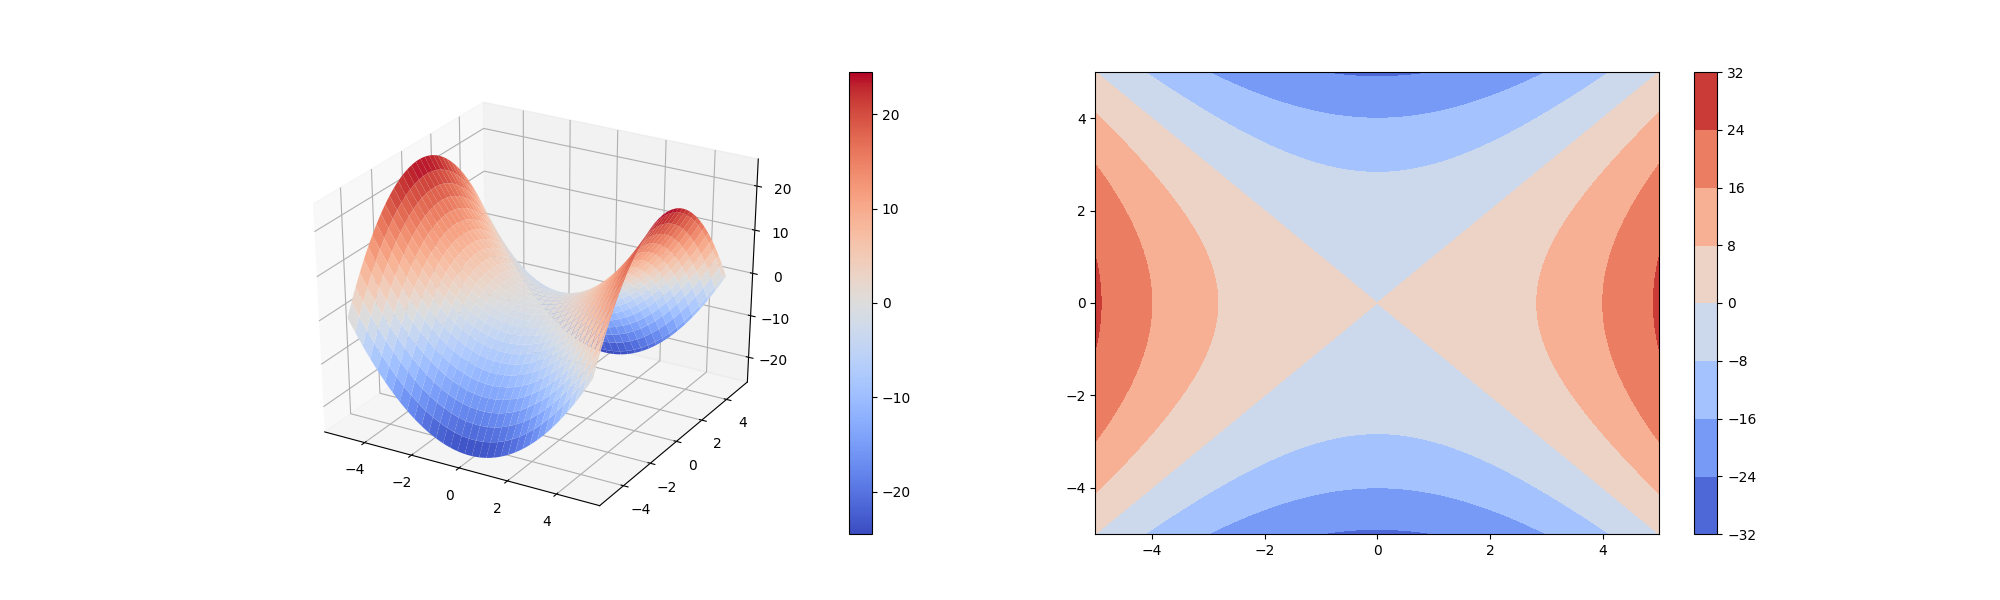

In [43]:
# Місце для Вашого коду

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121, projection='3d')

x = np.arange(-5, 5.1, 0.1)
y = np.arange(-5, 5.1, 0.1)

xx, yy = np.meshgrid(x, y)
zz = xx**2 - yy**2

surf = ax1.plot_surface(xx, yy, zz, cmap=cm.coolwarm)
fig.colorbar(surf)

ax2 = fig.add_subplot(122)
cont = ax2.contourf(xx, yy, zz, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()

## 2 Багатовимірний нормальний розподіл

Випадкова величина $\zeta$ має $k$-вимірний нормальний розподіл з вектором середніх $\mu$ та матрицею коваріацій $\Sigma$,
тобто $\zeta \sim N_k(\mu, \Sigma)$,
якщо її щільність дорівнює:
$$f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp \left\{ -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right\}.$$

Детальна інформація про клас `multivariate_normal` в [документації](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.multivariate_normal.html).

In [10]:
from scipy.stats import multivariate_normal

### 2.1 Щільність: 3-вимірний графік та контурний графік

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного стандартного нормального розподілу.

<IPython.core.display.Javascript object>


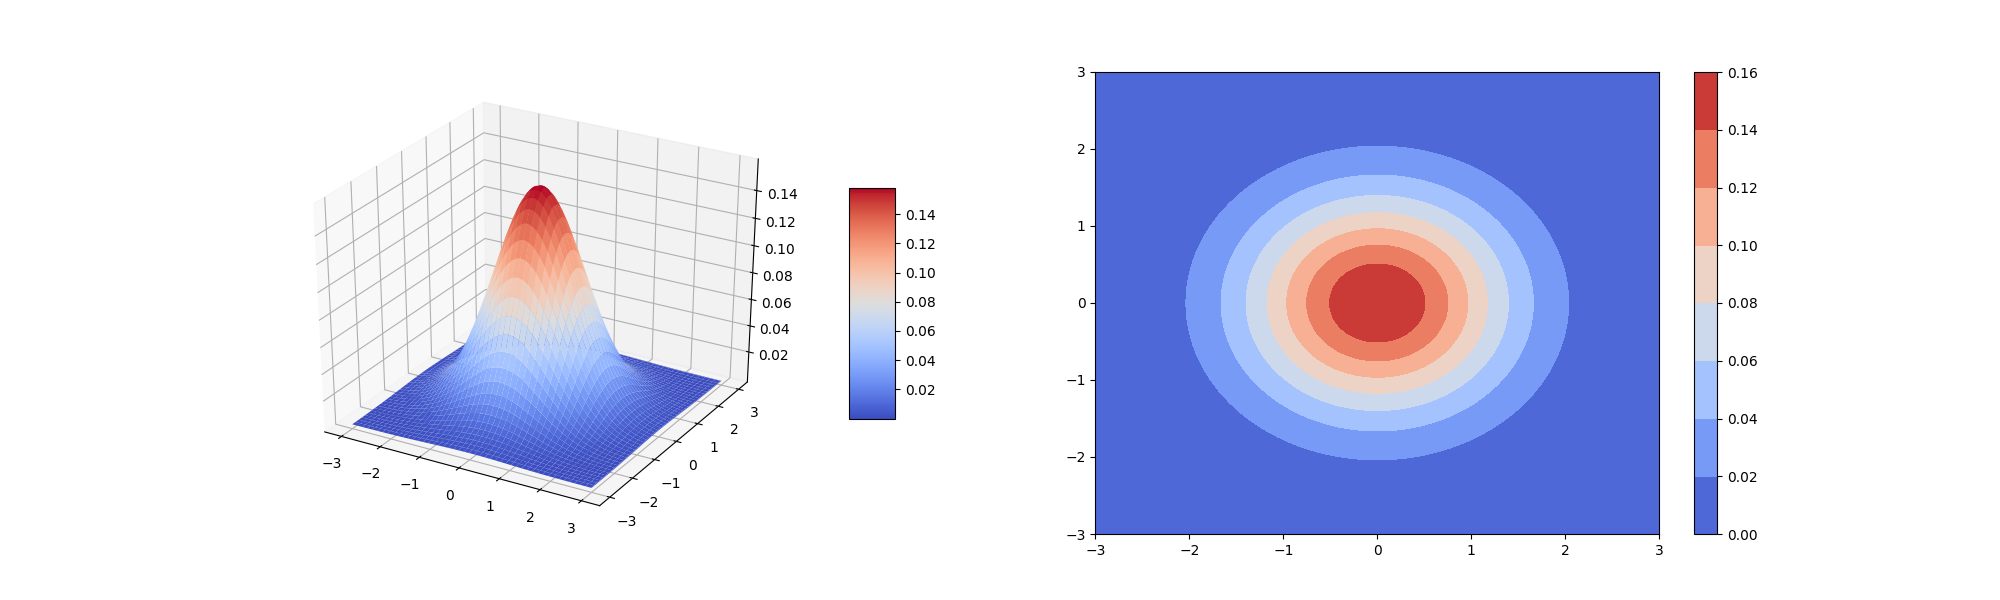

In [11]:
# Parameters of the distribution.
mean = [0, 0]
cov = [[1, 0],
       [0, 1]]

# Frozen random variable.
zeta = multivariate_normal(mean=mean, cov=cov)

# Make data.
x = np.arange(-3, 3.01, 0.01)
y = np.arange(-3, 3.01, 0.01)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))
z = zeta.pdf(pos)

# Prepare the figure.
fig = plt.figure(figsize=(20,6))

# Plot the surface.
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x,y,z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add contour plot of the surface.
ax2 = fig.add_subplot(122)
cont = ax2.contourf(x,y,z, cmap=cm.coolwarm)
fig.colorbar(cont)

plt.show()

#### 2.1.1 Функції `stack`

In [12]:
a = np.array((1,2,3))
b = np.array((2,3,4))
print(a)
print(b)

[1 2 3]
[2 3 4]


In [13]:
c = np.array([[1],[2],[3]])
d = np.array([[2],[3],[4]])
print(c)
print(d)

[[1]
 [2]
 [3]]
[[2]
 [3]
 [4]]


##### 2.1.1.1 Функція `numpy.hstack`

Детальна інформація про функцію `hstack` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html).

In [14]:
print(np.hstack((a,b)))

[1 2 3 2 3 4]


In [15]:
print(np.hstack((c,d)))

[[1 2]
 [2 3]
 [3 4]]


##### 2.1.1.2 Функція `numpy.vstack`

Детальна інформація про функцію `vstack` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html).

In [16]:
print(np.vstack((a,b)))

[[1 2 3]
 [2 3 4]]


In [17]:
print(np.vstack((c,d)))

[[1]
 [2]
 [3]
 [2]
 [3]
 [4]]


##### 2.1.1.3 Функція `numpy.dstack`

Детальна інформація про функцію `dstack` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dstack.html).

In [18]:
print(np.dstack((a,b)))

[[[1 2]
  [2 3]
  [3 4]]]


In [19]:
print(np.dstack((c,d)))

[[[1 2]]

 [[2 3]]

 [[3 4]]]


### 2.2 3D гістограма

Зобразіть гістограму $n = 100000$ значень із $2$-вимірного стандартного нормального розподілу.

<IPython.core.display.Javascript object>


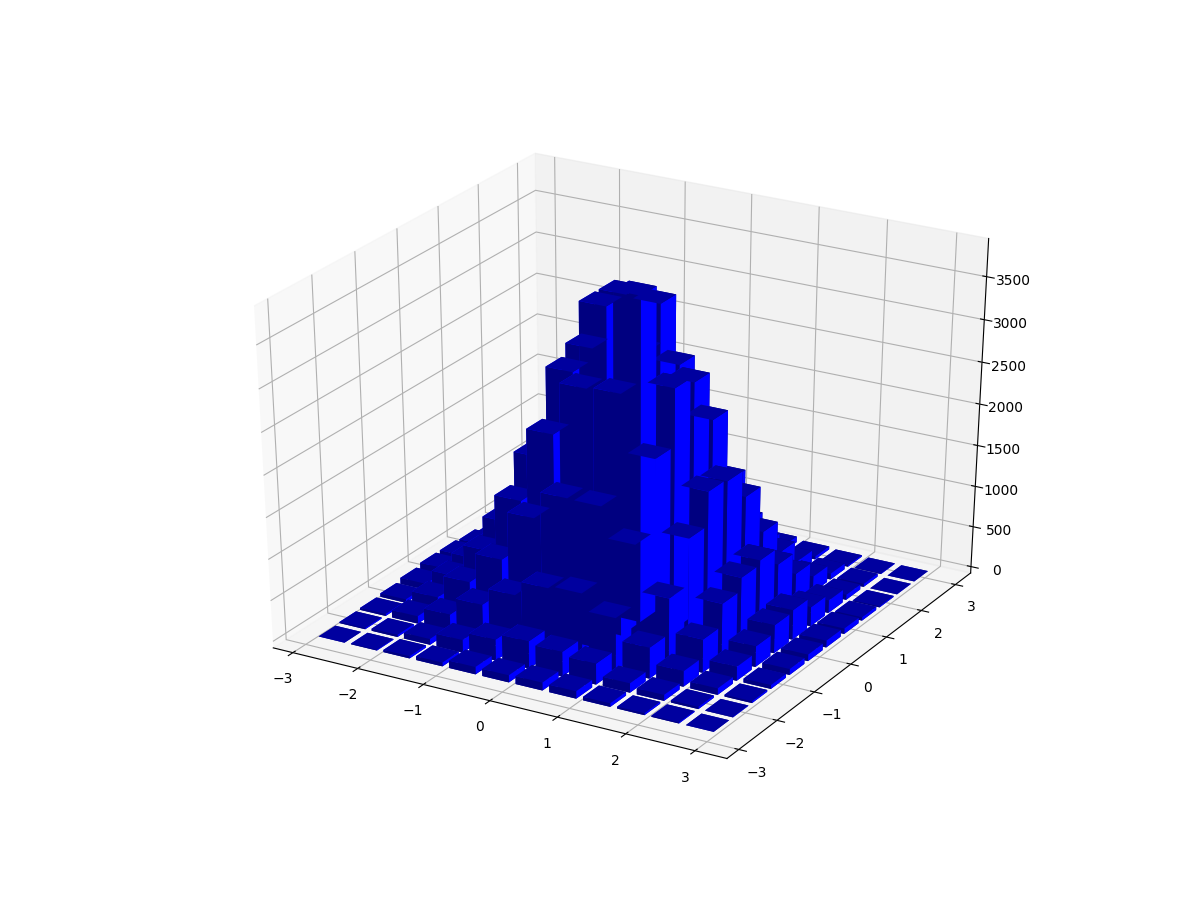

In [20]:
# Prepare the figure
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

# Generate random variates
n = 100000
rvs = zeta.rvs(size=n)
x = [el[0] for el in rvs]
y = [el[1] for el in rvs]

# Compute the bi-dimensional histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=12, range=[[-3, 3], [-3, 3]])

# Construct arrays for the anchor positions of the 12 bars
xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 12 bars
dx = dy = 0.4 * np.ones_like(zpos)
dz = hist.ravel()

# Plot 3D histogram
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

#### 2.2.1 Використані функції

##### 2.2.1.1 Функція `numpy.histogram2d`

Детальна інформація про функцію `histogram2d` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html).

##### 2.2.1.2 Функція `bar3d`

Детальна інформація про функцію `bar3d` в [документації](https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.bar3d).

##### 2.2.1.3 Функція `numpy.ravel`

Детальна інформація про функцію `ravel` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html).

In [21]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(np.ravel(a))

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


##### 2.2.1.4 Функція `numpy.ones_like`

Детальна інформація про функцію `ones_like` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html).

In [22]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(np.ones_like(a))

[[1 2 3]
 [4 5 6]]
[[1 1 1]
 [1 1 1]]


### 2.3 Нормована 3D гістограма та контурний графік

Зобразіть нормовану гістограму та контурний графік $n = 100000$ значень із $2$-вимірного стандартного нормального розподілу, отриманих в попередньому завданні.

<IPython.core.display.Javascript object>


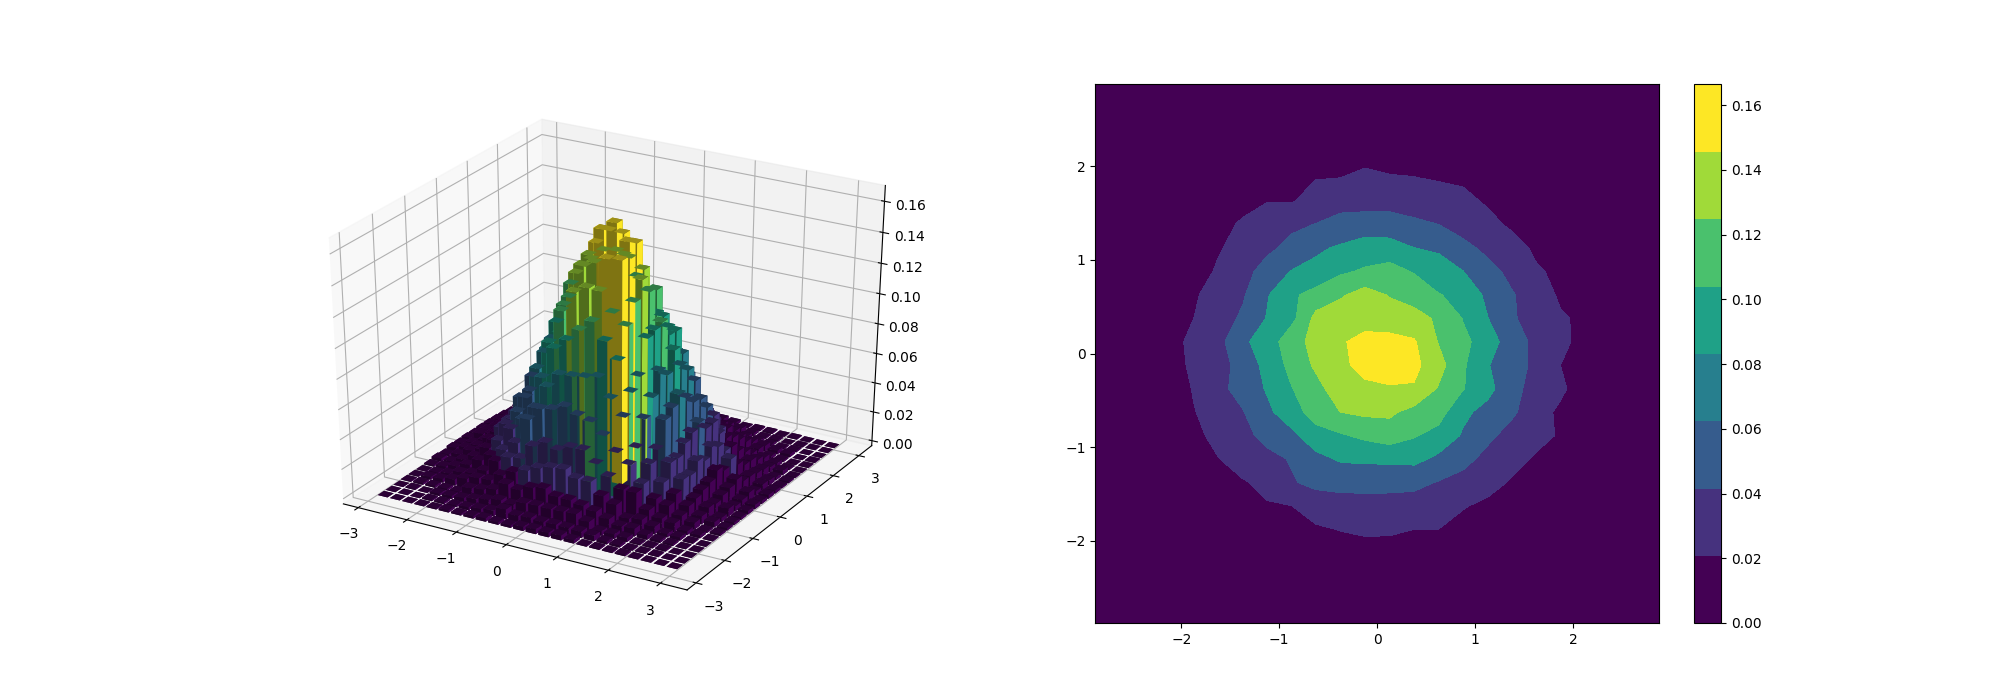

In [23]:
# Prepare the figure
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Uncomment to generate new values
# n = 100000
# rvs = zeta.rvs(size=n)
# x = [el[0] for el in rvs]
# y = [el[1] for el in rvs]

# Compute the bi-dimensional histogram
n_bins = 24
x_range = [-3, 3]
y_range = [-3, 3]
xy_range = [x_range, y_range]
hist, xedges, yedges = np.histogram2d(x, y, bins=n_bins, range=xy_range)

# Construct arrays for the anchor positions of the bars.
xpos1, ypos1 = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos1.ravel()
ypos = ypos1.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.2 * np.ones_like(zpos)
dz = hist.ravel()
x_length = (x_range[1] - x_range[0]) / n_bins
y_length = (y_range[1] - y_range[0]) / n_bins
dz_normed = dz / (n * x_length * y_length)

# Make color map with 8 colors
colors = cm.get_cmap('viridis', 8)

# Plot 3D histogram
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz_normed, color=colors(dz_normed / dz_normed.max()), zsort='average')

# Add color bar
colourMap = plt.cm.ScalarMappable(cmap=colors)
colourMap.set_array(dz_normed)
colBar = plt.colorbar(colourMap)

# Make contour plot
normed_hist = hist / (n * x_length * y_length)
ax2.contourf(xpos1, ypos1, normed_hist, cmap=colors)

plt.show()

### 2.4 Діаграма розсіювання

Зобразіть діаграму розсіювання $n = 100000$ значень із $2$-вимірного стандартного нормального розподілу, отриманих в пункті **2.2**.

<IPython.core.display.Javascript object>


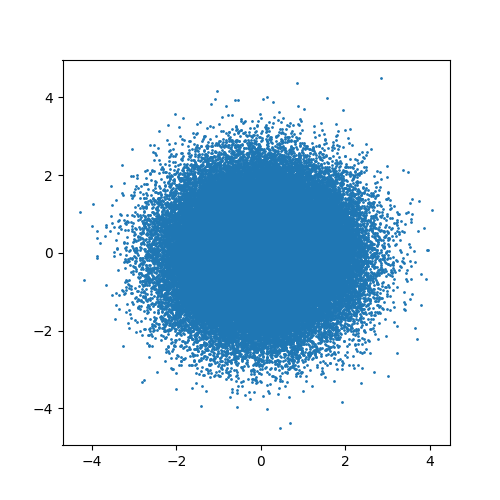

In [24]:
plt.figure(figsize=(5,5))
plt.plot(x, y, 'o', markersize=1)
plt.show()

### 2.5 Вибіркові статистики

Нехай $X = (x_1, \ldots, x_n), Y = (y_1, \ldots, y_n),
\overline{X} = \sum_{i = 1}^{n} x_i, \overline{Y} = \sum_{i = 1}^{n} y_i$.
Тоді:
1. вибіркова дисперсія дорівнює
$$
S_X^2 = S_{XX} = \frac{1}{n - 1} \sum_{i = 1}^{n} \left( x_i - \overline{X} \right)^2, \qquad
S_Y^2 = S_{YY} = \frac{1}{n - 1} \sum_{i = 1}^{n} \left( y_i - \overline{Y} \right)^2;
$$
2. вибіркова коваріація дорівнює
$$S_{XY} = \frac{1}{n - 1} \sum_{i = 1}^{n} \left( x_i - \overline{X} \right) \left( y_i - \overline{Y} \right);$$
3. вибіркова кореляція дорівнює
$$r_{XY} = \frac{S_{XY}}{S_X S_Y} = \frac{S_{XY}}{\sqrt{S_{XX} S_{YY}}}.$$

#### 2.5.1 Матриця коваріацій

Детальна інформація про функцію `cov` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html).

In [25]:
print(np.cov(x,y, ddof=1))

[[1.00479577e+00 6.77575506e-04]
 [6.77575506e-04 1.00064063e+00]]


#### 2.5.2 Матриця кореляцій

Детальна інформація про функцію `corrcoef` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html).

In [26]:
print(np.corrcoef(x,y))

[[1.00000000e+00 6.75740165e-04]
 [6.75740165e-04 1.00000000e+00]]


#### 2.5.3 Коефіцієнт кореляції Пірсона

Детальна інформація про функцію `pearsonr` в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.pearsonr.html).

In [27]:
from scipy.stats.mstats import pearsonr

print('Pearson correlation = {}'.format(pearsonr(x,y)[0]))

Pearson correlation = 0.000675740165157841


#### 2.5.4 Коефіцієнт кореляції Спірмена

Детальна інформація про функцію `spearmanr` в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.spearmanr.html).

In [28]:
from scipy.stats.mstats import spearmanr

print('Spearman correlation = {}'.format(spearmanr(x,y)[0]))

Spearman correlation = -4.3615187920361524e-05


### 2.6 Зміна матриці коваріацій

#### 2.6.1 Завдання 2.6.1

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} -1 \\ 1 \end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 4 & 0.5 \\ 0.5 & 1 \end{bmatrix}.$$

In [29]:
# Місце для Вашого коду



#### 2.6.2 Завдання 2.6.2

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 0 \\ 0\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 1 \end{bmatrix}.$$

In [30]:
# Місце для Вашого коду



## 3 Некорельованість не означає незалежність

### 3.1 Дискретний випадок

Нехай маємо дві дискретні випадкові величини $\xi, \eta$ такі, що
$$
\left.
  \xi =
    \left\{
      \begin{aligned}
        1 \quad \text{ з імовірністю } p_1 \\
        2 \quad \text{ з імовірністю } p_2
      \end{aligned}
    \right.
\right.
, \qquad
\left.
  \eta =
    \left\{
      \begin{aligned}
        1 \quad \text{ з імовірністю } q_1 \\
        2 \quad \text{ з імовірністю } q_2 \\
        3 \quad \text{ з імовірністю } q_3
      \end{aligned}
    \right.
\right.
, \qquad
P(\xi = i, \eta = j) = p_{ij}, \quad i = 1, 2, j = 1, 2, 3
.$$
Нехай $p_1 = p_2 = \frac{1}{2}, q_1 = q_2 = q_3 = \frac{1}{3}, p_{ij} = \frac{1}{6}, \forall \, i, j$.
Тоді виконується умова незалежності
$$p_{ij} = p_i q_j, \qquad \forall \, i, j.$$

Обчисліть $E[\xi], E[\eta], E[\xi \eta]$.
Чи виконується умова некорельованості
$$E[\xi \eta] = E[\xi] E[\eta]?$$

In [31]:
# Місце для Вашого коду



Змініть сумісний розподіл $\xi$ та $\eta$, тобто $p_{ij}$, так, щоб виконувалася умова некорельованості, але не виконувалася умова незалежності.
Тобто
$$E[\xi \eta] = E[\xi] E[\eta], \text{ але } \exists \, k, l : p_{kl} \neq p_k q_l.$$

In [32]:
# Місце для Вашого коду



## 4 Незалежність випадкових величин з Лобораторного заняття №8

### 4.1 Перетворення Бокса-Мюллера

Розглянемо дві випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1)$.

Тоді випадкові величини
$$\zeta_1 = \sqrt{-2 \log{\xi_1}} \cos(2 \pi \xi_2)$$,
$$\zeta_2 = \sqrt{-2 \log{\xi_1}} \sin(2 \pi \xi_2)$$
незалежні та мають стандартний нормальний розподіл.
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 100000$ значень випадкових величин $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.
5. Для значень двох незалежних стандартних нормальних випадкових величин побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.

In [33]:
# Місце для Вашого коду



### 4.2 Експоненційний розподіл з аудиторної роботи

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= 2 \min\{ \xi_1, \xi_2 \} \sim Exp(1), \\
\zeta_2 &= \max\{ \xi_1, \xi_2 \} - \min\{ \xi_1, \xi_2 \} \sim Exp(1)
\end{aligned}
$$
незалежні.
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 100000$ значень випадкових величин $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.
5. Для значень двох незалежних стандартних експоненційних випадкових величин побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.

In [34]:
# Місце для Вашого коду



## 5 Генерування залежних випадкових величин

### 5.1 Нормальний розподіл

Нехай $\zeta = (\zeta_1, \zeta_2)^T \sim N_2(\textbf{0}, I)$, тобто $\zeta_1, \zeta_2 \sim N(0, 1)$ &mdash; незалежні,
$A$ &mdash; матриця $2 \times 2$, $m$ &mdash; вектор $2 \times 1$.
Тоді
$$A \zeta + m \sim N_2 (m, A A^T).$$

#### 5.1.1 Розклад Холецького

Детальна інформація в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.cholesky.html).

In [35]:
x = np.array([[2, 1], [1, 4]])
print(x)

[[2 1]
 [1 4]]


In [36]:
y = np.linalg.cholesky(x)
print(y)

[[1.41421356 0.        ]
 [0.70710678 1.87082869]]


In [37]:
x1 = y.dot(y.T)
print(x1)
print((x==x1).all())
print(x-x1)

[[2. 1.]
 [1. 4.]]
False
[[-4.4408921e-16  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]]


#### 5.1.2 Додатна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Згенеруйте випадковий вектор $\zeta = (\zeta_1, \zeta_2)$ з $2$-вимірного нормального розподілу з параметрами
$$
\mu = \begin{bmatrix} -1 \\ 1 \end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 4 & 0.5 \\ 0.5 & 1 \end{bmatrix}
$$
за допомогою лінійного перетворення випадкових величин $\xi_1, \xi_2$ та розкладу Холецького матриці $\Sigma$.

1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2 \sim N(0,1)$;
2. Отримайте $n = 100000$ значень $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

In [38]:
# Місце для Вашого коду



### 5.2 Експоненційний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.2.1 Додатна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу
та незалежну від них випадкову величину $\eta$ з розподілу Бернуллі з параметром $p$.
Тобто $\xi_1, \xi_2 \sim Exp(1), \eta \sim Bernoulli(p)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= (1 - p) \xi_1 + \eta \xi_2 \sim Exp(1), \\
\zeta_2 &= (1 - p) \xi_2 + \eta \xi_1 \sim Exp(1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$Corr(\zeta_1, \zeta_2) = 3 p (1 - p).$$

Для параметра $p = 0.75$
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2, \eta$;
2. Отримайте $n = 100000$ значень $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

In [39]:
# Місце для Вашого коду



### 5.3 Рівномірний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.3.1 Додатна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу
та незалежну від них випадкову величину $\eta$ з розподілу Бернуллі з параметром $p$.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1), \eta \sim Bernoulli(p)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= 1 - \xi_1^{(1 - p)} \xi_2^{\eta} \sim Uniform(0, 1), \\
\zeta_2 &= 1 - \xi_2^{(1 - p)} \xi_1^{\eta} \sim Uniform(0, 1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$Corr(\zeta_1, \zeta_2) = 3 p (1 - p) \frac{8 + 7 (1-p) + (1-p)^2}{(2-p)^2 (3-p)^2}.$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2, \eta$;
2. Отримайте $n = 100000$ значень $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

In [40]:
# Місце для Вашого коду

